In [2]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,SMOTEN
import plotly.express as px
from sklearn.linear_model import LogisticRegression
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

In [4]:
#reading datafile
df=pd.read_csv('D:\churn\MLProject-ChurnPrediction\churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#dropping customer id collumn
df=df.drop('customerID',axis=1)

In [ ]:
#shape
df.shape

(7043, 20)

In [ ]:
#null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7043 non-null   int64  
 1   partner           7043 non-null   object 
 2   dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   multiplelines     7043 non-null   object 
 5   internetservice   7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  paperlessbilling  7043 non-null   object 
 14  paymentmethod     7043 non-null   object 
 15  monthlycharges    7043 non-null   float64
 16  totalcharges      7043 non-null   object 


The total charges is having object data type we need to change to float. We will do it in later stage

In [6]:
#lower casing the collumns
df.columns=df.columns.str.lower()

In [ ]:
#describe
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#mapping target columns
df['churn']=df['churn'].map({'No':0,'Yes':1})

mapping churn column with No as 0 and Yes as 1

## EDA and Data Cleaning

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<AxesSubplot:>

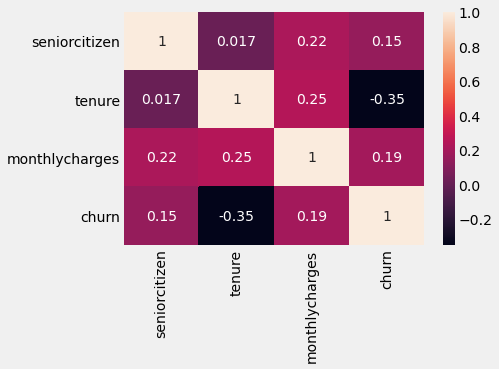

In [ ]:
#checking correlation
sns.heatmap(df.corr(),annot=True)

In [9]:
#pie chart for traget column
fig=px.pie(df,names='churn',height=400,width=400,title='Class distribution of churn')
fig.show()
100*(df['churn'].value_counts())/(df.shape[0])

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

 There is class imbalance here. 74% belong to No class and 26% belong to yes class

<AxesSubplot:xlabel='gender', ylabel='churn'>

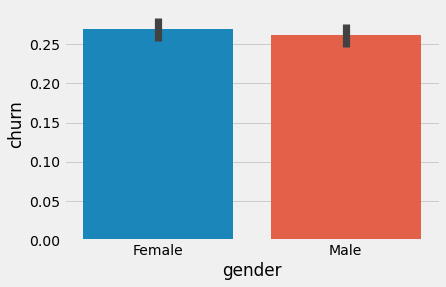

In [ ]:
#significance of gender on churn
sns.barplot(x='gender',y='churn',data=df)

From the bar plot it can be inferred that both male and female are having almost same probabilities of churning. So,we can drop this feature.

In [ ]:
#checking statistical significance of gender
tab=pd.crosstab(df['gender'],df['churn'])
chi2,p,dof,_=chi2_contingency([tab[0].values,tab[1].values])
print('chi2: ',chi2)
print('p-value: ',p)
print('dof: ',dof)

chi2:  0.4840828822091383
p-value:  0.48657873605618596
dof:  1


Also,the statistical analysis shows that it has gender very less effect on the churn variable since the p-value >0.05

In [ ]:
#dropping gender column
df=df.drop('gender',axis=1)

<AxesSubplot:xlabel='seniorcitizen', ylabel='churn'>

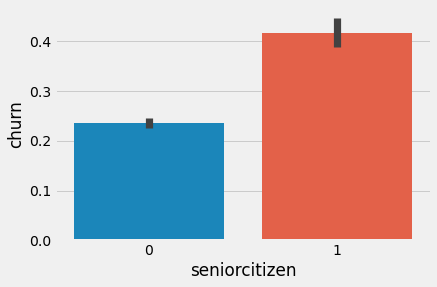

In [ ]:
#significance of senior citizen
sns.barplot(x='seniorcitizen',y='churn',data=df)

From the above figure it can be seen that senior citizens are more likely to churn. It may be due to the bad health of the senior citizen or may the death of senior citizen or may be they moved outside the country after their retirement from the service. They might also have find cheap plan for the same service.

Text(0.5, 0, 'Tenure')

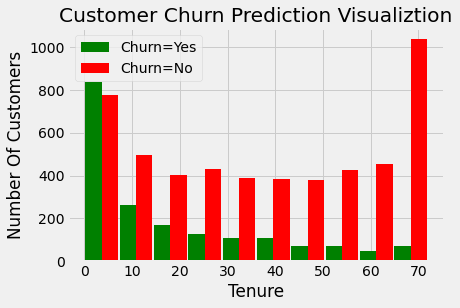

In [ ]:
#effect of tenures on churn
tenure_churn_no = df[df.churn==0].tenure
tenure_churn_yes = df[df.churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Tenure')

Customeers who are with the company for higher tenures are less likely to churn while the customers in inital tenure are more likely to get churned. So, we can offer them some coupons or benefits to avail.

<AxesSubplot:xlabel='partner', ylabel='churn'>

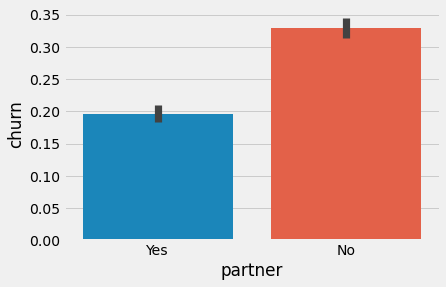

In [ ]:
#effect of partner on churn
sns.barplot(x='partner',y='churn',data=df)

from the above plot it seems like people having no partners are more likely to get churned. 

<AxesSubplot:xlabel='phoneservice', ylabel='churn'>

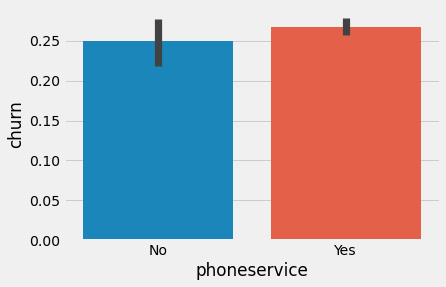

In [ ]:
#effect of phone services on churn
sns.barplot(x='phoneservice',y='churn',data=df) #not much effect on traget

From the visualization it can be seen that there is hardly effect of phoneservice on the churnining of customer. We can drop this feature as it's now showing any kind of trend.

In [ ]:
#checking statistical significance of phoneservice
tab=pd.crosstab(df['phoneservice'],df['churn'])
chi2,p,dof,_=chi2_contingency([tab[0].values,tab[1].values])
print('chi2: ',chi2)
print('p-value: ',p)
print('dof: ',dof)

chi2:  0.9150329892546948
p-value:  0.3387825358066928
dof:  1


The statistical analysis is done to check if there is any significant effect of phone service on the churn of customers and the p-value >0.05 which says there is not enough evidence to prove that phoneservice has any significant effect on the churn of customers.

In [ ]:
#dropping phone service
df=df.drop('phoneservice',axis=1)

In [ ]:
df.head()

,seniorcitizen,partner,dependents,tenure,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<AxesSubplot:xlabel='internetservice', ylabel='churn'>

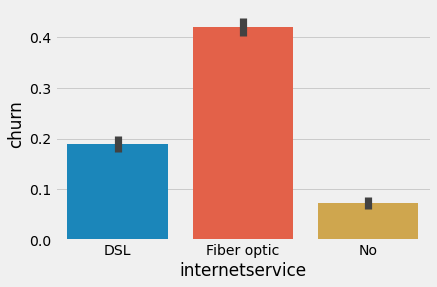

In [ ]:
#effect of internet service on churn
sns.barplot(x='internetservice',y='churn',data=df)

customer with fiber optics are more likely to churn. It may be due to higher cost of the internet service or may be they didn't get the appropriate speed. We can give the discounts on fiber optics as well as some bonuses regarding internet services and we can take feedback from the customer after couple of time.

In [ ]:
#checking statistical significance of internetservice
tab=pd.crosstab(df['internetservice'],df['churn'])
chi2,p,dof,_=chi2_contingency([tab[0].values,tab[1].values])
print('chi2: ',chi2)
print('p-value: ',p)
print('dof: ',dof)

chi2:  732.309589667794
p-value:  9.571788222840544e-160
dof:  2


The statistical analysis  has been done for the feature internetservice  and p-value is almost zeros which means the feature is stastically significant and it has effect on the churn

<AxesSubplot:xlabel='multiplelines', ylabel='churn'>

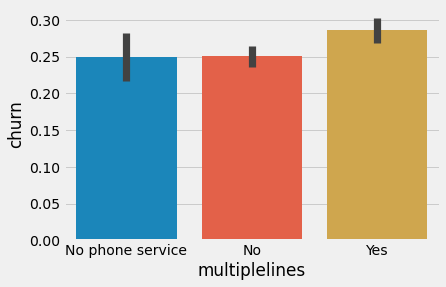

In [ ]:
#effect of multipipelines on churn
sns.barplot(x='multiplelines',y='churn',data=df)

In [ ]:
#checking unique values for multipleline
df['multiplelines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

In [ ]:
#mapping no phone servive service into No
df['multiplelines']=df['multiplelines'].apply(lambda x:'No' if x=='No phone service' else x)

No phone service has been mapped to No since it is giving the same information of No

<AxesSubplot:xlabel='multiplelines', ylabel='churn'>

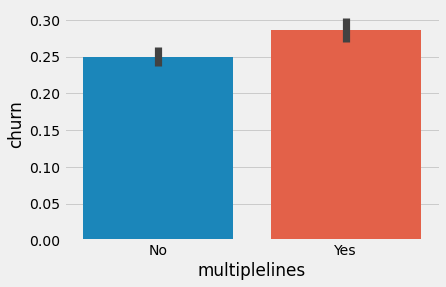

In [ ]:
#after mapping 
#significance of multipipelines
sns.barplot(x='multiplelines',y='churn',data=df)

From the plot it seems like people having mutiplelines of connection are more liekly to churn. It may be due to increased cost. We can offer such customers some benefits to avail like free interent for two months.

In [ ]:
#checking statistical significance of multiplelines
tab=pd.crosstab(df['multiplelines'],df['churn'])
chi2,p,dof,_=chi2_contingency([tab[0].values,tab[1].values])
print('chi2: ',chi2)
print('p-value: ',p)
print('dof: ',dof)

chi2:  11.143251001456253
p-value:  0.0008433795342472412
dof:  1


The statistical analysis has been done for the feature multiplelines and p-value is almost zeros which means the feature is stastically significant and it has effect on the churn of the customers.

<AxesSubplot:xlabel='onlinesecurity', ylabel='churn'>

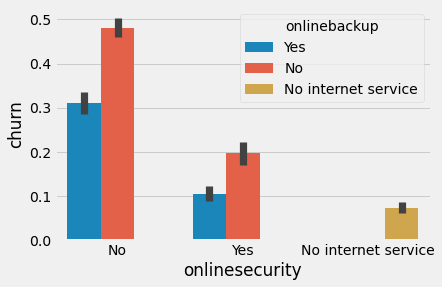

In [ ]:
#effect of online security
sns.barplot(x='onlinesecurity',y='churn',data=df,hue='onlinebackup')

In [ ]:
#mapping no internet servive service into No
df['onlinesecurity']=df['onlinesecurity'].apply(lambda x:'No' if x=='No internet service' else x)

In [ ]:
#mapping no internet servive service into No
df['onlinebackup']=df['onlinebackup'].apply(lambda x:'No' if x=='No internet service' else x)

No internet service has been mapped to No since it is giving the same information of No

<AxesSubplot:xlabel='onlinesecurity', ylabel='churn'>

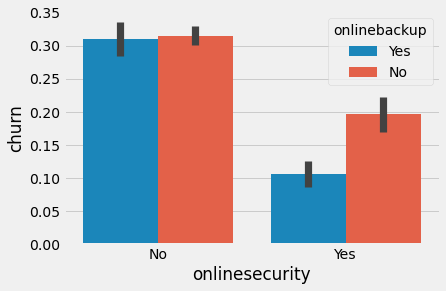

In [ ]:
#after mapping 
#effect of onlinesecurity
sns.barplot(x='onlinesecurity',y='churn',data=df,hue='onlinebackup')

Online security has significant effect on the churn of the customers.

<AxesSubplot:xlabel='deviceprotection', ylabel='churn'>

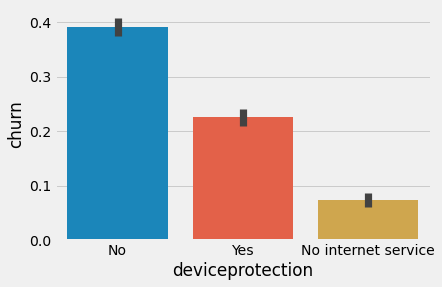

In [ ]:
#effect of device protection
sns.barplot(x='deviceprotection',y='churn',data=df)

In [ ]:
#mapping no internet servive service into No
df['deviceprotection']=df['deviceprotection'].apply(lambda x:'No' if x=='No internet service' else x)

No internet service has been mapped to No since it is giving the same information of No

<AxesSubplot:xlabel='deviceprotection', ylabel='churn'>

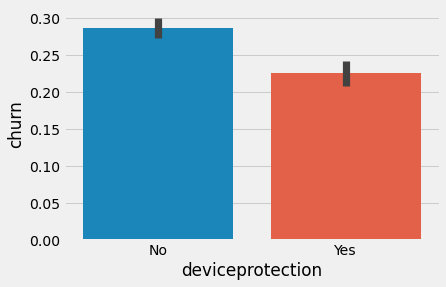

In [ ]:
#after mapping
#effect of device protection
sns.barplot(x='deviceprotection',y='churn',data=df)

From the plot it can be infurred that the customer are more likely to churn if they have no device protection.

<AxesSubplot:xlabel='techsupport', ylabel='churn'>

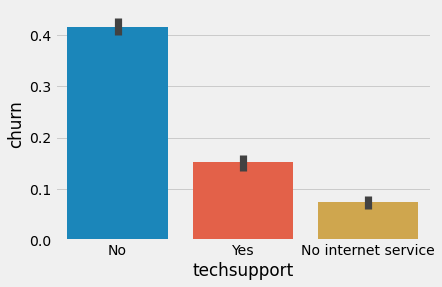

In [ ]:
#effect of techsupport
sns.barplot(x='techsupport',y='churn',data=df)

In [ ]:
#mapping no internet servive service into No
df['techsupport']=df['techsupport'].apply(lambda x:'No' if x=='No internet service' else x)

No internet service has been mapped to No since it is giving the same information of No

<AxesSubplot:xlabel='techsupport', ylabel='churn'>

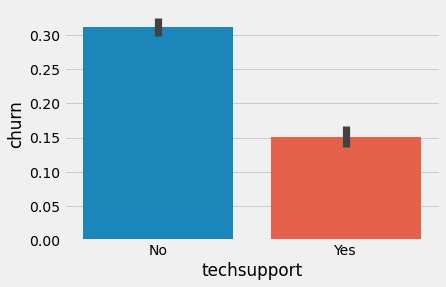

In [ ]:
#after mapping
#significance of techsupport
sns.barplot(x='techsupport',y='churn',data=df)

Customers are more likely to churn in the case when there is no tech support. We need to increase our tech support to customers.

<AxesSubplot:xlabel='streamingtv', ylabel='churn'>

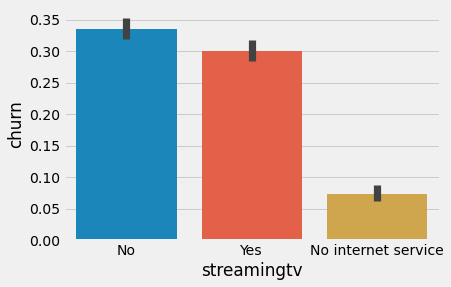

In [ ]:
#significance pf streamingtv
sns.barplot(x='streamingtv',y='churn',data=df)

In [ ]:
#mapping no internet servive service into No
df['streamingtv']=df['streamingtv'].apply(lambda x:'No' if x=='No internet service' else x)

<AxesSubplot:xlabel='streamingtv', ylabel='churn'>

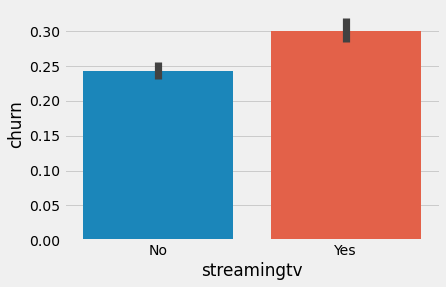

In [ ]:
#after mapping
#significance pf streamingtv
sns.barplot(x='streamingtv',y='churn',data=df)

Customers having tv streaming tv are more likely to churn it may because of higher cost of streaming, not adequate quality of streaming.

<AxesSubplot:xlabel='streamingmovies', ylabel='churn'>

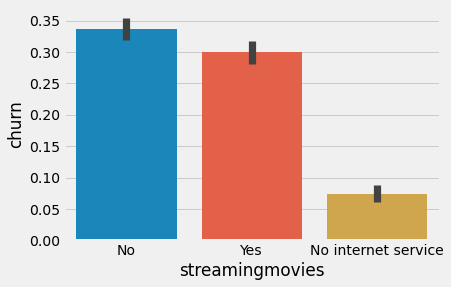

In [ ]:
#significance pf streamingmovies
sns.barplot(x='streamingmovies',y='churn',data=df)

In [ ]:
#mapping no internet servive service into No
df['streamingmovies']=df['streamingmovies'].apply(lambda x:'No' if x=='No internet service' else x)

<AxesSubplot:xlabel='streamingmovies', ylabel='churn'>

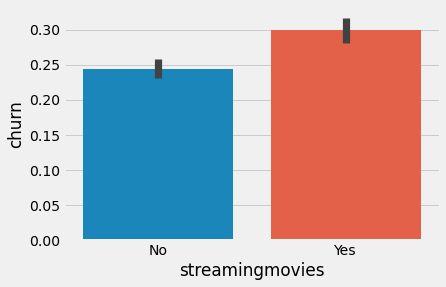

In [ ]:
#after mapping
#significance pf streamingtv
sns.barplot(x='streamingmovies',y='churn',data=df)

Customers having tv streaming movies are more likely to churn it may because of higher cost of internet charges or slower speed. We can provide the customers higher speed plan at lower rates

<AxesSubplot:xlabel='contract', ylabel='churn'>

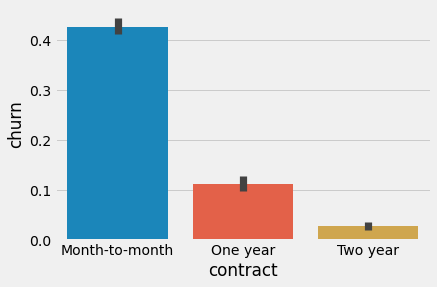

In [ ]:
#effect of contract on churn
sns.barplot(x='contract',y='churn',data=df)

People with short contract are more likely to churn than with one year and two year. So, we can giving some amazing offers to newly joined customers as well as our old customers.

<AxesSubplot:xlabel='paperlessbilling', ylabel='churn'>

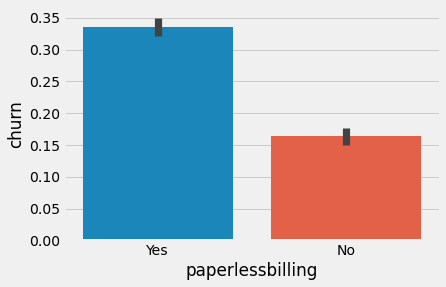

In [ ]:
#effect of paperless billing on churn
sns.barplot(x='paperlessbilling',y='churn',data=df)

In [ ]:
#checking statistical significance of parelessbilling
tab=pd.crosstab(df['paperlessbilling'],df['churn'])
chi2,p,dof,_=chi2_contingency([tab[0].values,tab[1].values])
print('chi2: ',chi2)
print('p-value: ',p)
print('dof: ',dof)

chi2:  258.27764906707307
p-value:  4.073354668665985e-58
dof:  1


After doing chi square analyis. It's concluded that paperess billing has significant on the churn and it's evident from the bar graph also

<AxesSubplot:xlabel='paymentmethod', ylabel='churn'>

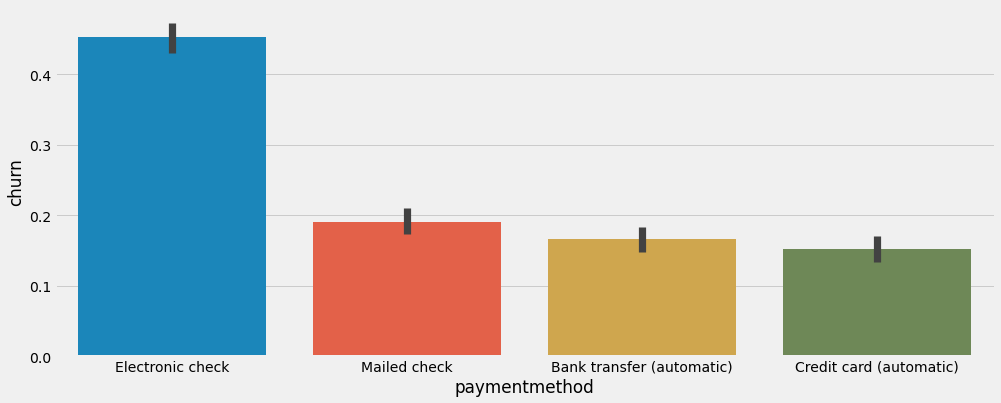

In [ ]:
#effect of payementmoethod on churn
plt.figure(figsize=(15,6))
sns.barplot(x='paymentmethod',y='churn',data=df)

Customers with electronic check payemnet methods are more likely to churn. 

<AxesSubplot:xlabel='monthlycharges'>

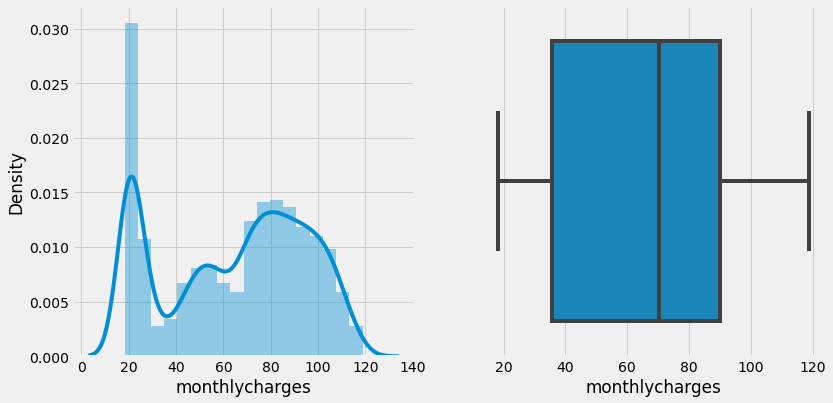

In [ ]:
#density plot for monthly charges
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df['monthlycharges'],ax=ax[0])
#bocplot for monthly charges
sns.boxplot(df['monthlycharges'],ax=ax[1])

Text(0.5, 0, 'Monthly charges')

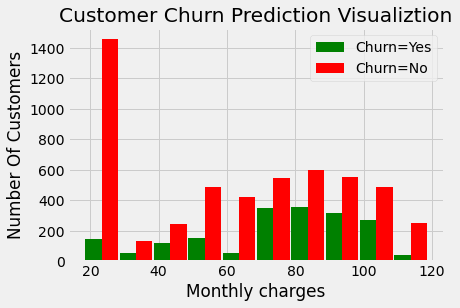

In [ ]:
#effect of monthly charges on churn
mc_churn_no = df[df.churn==0].monthlycharges
mc_churn_yes = df[df.churn==1].monthlycharges

plt.xlabel("Monthlycharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Monthly charges')

Customers with monthly charges between 70-100 aee more likely to churn than the other customers. 

In [ ]:
#creplacing ' ' with zero for totalcharges feature
df['totalcharges']=df['totalcharges'].apply(lambda x:0 if x==' ' else x )

In [ ]:
#chaging datatype of totalcharges to float
df['totalcharges']=df['totalcharges'].astype('float')

<AxesSubplot:xlabel='totalcharges'>

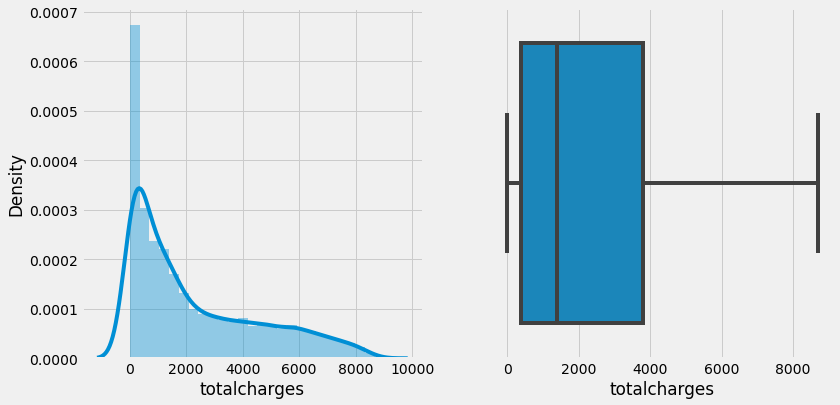

In [ ]:
#density plot for total charges
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df['totalcharges'],ax=ax[0])
#bocplot for monthly charges
sns.boxplot(df['totalcharges'],ax=ax[1])

In [ ]:
df['totalcharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

The distribution of totalcharges is rightly skewed which means the data has been pushed to right i.e 50% of people are paying more total charges.

## model building

In [ ]:
#setting of taget and features
X=df.drop('churn',axis=1)
y=df['churn']

In [ ]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#appending all categorical values
cat_cols=x_train.select_dtypes(include=['object']).columns.tolist()
cat_cols

['partner',
 'dependents',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
# ct=ColumnTransformer([
#     ('encode',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_cols)
# ])

In [ ]:
#label encoding the categorical columns
label=LabelEncoder()
for i in cat_cols:
    x_train[i]=label.fit_transform(x_train[i]) 
    x_test[i]=label.transform(x_test[i])
    label_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
    print(label_name_mapping)

{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'DSL': 0, 'Fiber optic': 1, 'No': 2}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'Month-to-month': 0, 'One year': 1, 'Two year': 2}
{'No': 0, 'Yes': 1}
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


In [ ]:
#cross validating various model based on f1 score
from sklearn.model_selection import cross_val_score
pipeline=[]
pipeline.append(['Forest',Pipeline([('scale',MinMaxScaler()),('model',RandomForestClassifier())])])
pipeline.append(['Gradient boost',Pipeline([('scale',MinMaxScaler()),('model',GradientBoostingClassifier())])])
pipeline.append(['Logistic',Pipeline([('scale',MinMaxScaler()),('model',LogisticRegression())])])
pipeline.append(['Ada',Pipeline([('scale',MinMaxScaler()),('model',AdaBoostClassifier())])])
pipeline.append(['svm',Pipeline([('scale',MinMaxScaler()),('model',SVC())])])
# pipeline.append(['xgboost',Pipeline([('scale',MinMaxScaler()),('model',XGBClassifier())])])
for i, j in pipeline:
    cvc=cross_val_score(j,x_train,y_train,scoring='f1').mean()
    print(f'{i}:',cvc)

Forest: 0.5677492679277697
Gradient boost: 0.5909690153048397
Logistic: 0.5897983811434753
Ada: 0.5987352977615955
svm: 0.5577019623355006


## Adaboost Model

In [ ]:
pp=Pipeline([
#     ('ct',ct),
    ('scale',MinMaxScaler()), #not needed for tree models
    ('smote',SMOTE()), #oversampling for handling class imbalance
#     ('model',GradientBoostingClassifier())
#     ('model',RandomForestClassifier(class_weight='balanced',n_estimators=50))
    ('model',AdaBoostClassifier())
])

In [ ]:
#prediction on test data 
y_pred=pp.fit(x_train,y_train).predict(x_test)

In [ ]:
#classification matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1041
           1       0.53      0.71      0.60       368

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.76      0.77      1409



In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[807, 234],
       [108, 260]], dtype=int64)

since there is class imbalance here accuracy might note be the correct matrix here. We will consider f1score.

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param={
    'model__n_estimators':[50,100,200,300],
    'model__learning_rate':[0.1,0.01,0.05,0.09,0.1,0.5,0.9]
}
gvc=GridSearchCV(pp,param_grid=param,scoring='f1')

In [ ]:
best_param=gvc.fit(x_train,y_train)

In [ ]:
#best parameters
best_param.best_params_

{'model__learning_rate': 0.5, 'model__n_estimators': 200}

In [ ]:
#precicting on best parameters
y_pred_new=best_param.predict(x_test)

In [ ]:
#classification matrix
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1041
           1       0.54      0.71      0.61       368

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred_new)

array([[818, 223],
       [108, 260]], dtype=int64)

In [ ]:
#auc score
r_auc_ad=roc_auc_score(y_test,y_pred_new)
r_auc_ad

0.7461523200935555

In [ ]:
#probability predict
ad_proba=best_param.predict_proba(x_test)[:,1]

In [ ]:
#roc curve
ad=roc_curve(y_test,ad_proba)

We have actually reduced our False positives by hyperparameter tuning

## logistic Regression Model

In [ ]:
pp=Pipeline([
    ('scale',MinMaxScaler()),
    ('model',LogisticRegression(class_weight='balanced'))
])

In [ ]:
#prediction on test data
y_pred=pp.fit(x_train,y_train).predict(x_test)

In [ ]:
#classification matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1041
           1       0.48      0.76      0.59       368

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.73      0.74      1409



In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[742, 299],
       [ 87, 281]], dtype=int64)

In [ ]:
#tuning thareshols
y_pred_tuned=np.where(pp.predict_proba(x_test)[:,1]>0.6,1,0) #tharesold=0.6

In [ ]:
#confusion matrix tuned
confusion_matrix(y_test,y_pred_tuned)

array([[825, 216],
       [111, 257]], dtype=int64)

In [ ]:
#classification matrix
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1041
           1       0.54      0.70      0.61       368

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [ ]:
#auc score
lg_ac=roc_auc_score(y_test,y_pred_tuned)
lg_ac

0.7454383849141711

In [ ]:
#probability predict
lg_proba=pp.predict_proba(x_test)[:,1]

In [ ]:
#probability predict 
lg=roc_curve(y_test,lg_proba)

## Naive bayes model

In [ ]:
pp=Pipeline([
    ('scale',MinMaxScaler()),
    ('smote',SMOTE()),
    ('model',GaussianNB())
])

In [ ]:
#prediction on test data
y_pred_naive=pp.fit(x_train,y_train).predict(x_test)

In [ ]:
#classification matrix
print(classification_report(y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1041
           1       0.47      0.77      0.59       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[742, 299],
       [ 87, 281]], dtype=int64)

In [ ]:
#roc score
nb_auc=roc_auc_score(y_test,y_pred_naive)
nb_auc

0.7354511235016498

In [ ]:
#probability predict
nb_proba=pp.predict_proba(x_test)[:,1]

In [ ]:
#probability predict 
nb=roc_curve(y_test,lg_proba)

## ROC curve for the models

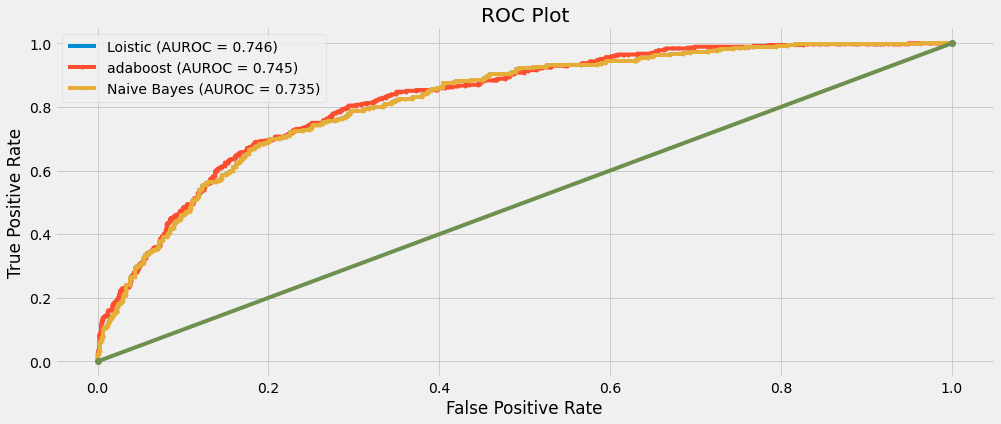

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(lg[0] ,lg[1] , linestyle='-', label='Loistic (AUROC = %0.3f)' % r_auc_ad)
plt.plot(ad[0], ad[1], marker='.', label='adaboost (AUROC = %0.3f)' % lg_ac)
plt.plot(nb[0], nb[1], marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot([0,1],[0,1],marker='o')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

**Description of model and Insights**


*   Data cleaning has been performed.
*   No null values were found. However, blank spaces were there which were replaced with zero in total purchase collumn.
*   EDA was performed and the features were selected based on it. Statistical test like chi2-sqaure test has also been used for the feature selection. 
*   Various model performance has been shown in the ROC  curve. Logistic regression has performed best. It gave the auc score for 74.6% at thareshold of 0.6.

*   There was class imbalance in the data so oversampling technique has been used to counter the class imbalance. 
*   F1 score is matrix of concern since the dataset has class imbalance the accuracy won't be a good matrix here since ML algorithms have biasness towards the majority class.
*   Key factors like  contract,seniorcitizen,tenure,totalcharges have significant effect on the churn of the customers. Customer having longer contract are less likely to churn since they are under contraint. 
*   We can offer customers discounts, coupouns,special services to let them intact with the company and it can be monitored via the feedback taken from the customers every week or month. We can also provide them cheap internet plans and outgoing calls. 





